# Course Code: DS4003 
# Course Name: Principles and Techniques for Data Science 
# Homework Assignment 2
# Due date: 1st November 2024
## Save the notebook with your name and submit it by the due date.


Didactic purpose of this assignment:

- Practice your Python coding skills for common data science tasks such as dimensionality reduction, clustering and anomaly detection.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

## Data overview

This dataset contains information on transactions made by credit card users from a region in Europe. The dataset has been normalized and cleaned already. The features are as follows:

- V1 to V28: Obtained from a transformation on the original features that are not available to protect the identity of the users.
- Amount: The amount of the transaction


In [2]:
filepath = 'credit_data.csv'
data = pd.read_csv(filepath)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.995402,0.759562,0.812335,0.207020,0.763784,0.256126,0.263067,0.783640,0.438613,0.528689,...,0.579891,0.562624,0.517245,0.668761,0.485196,0.575667,0.370923,0.415570,0.311772,0.000488
1,0.974924,0.764642,0.834968,0.301692,0.765830,0.263912,0.266220,0.785619,0.469729,0.508564,...,0.580933,0.563318,0.512089,0.661086,0.276083,0.612794,0.391194,0.416504,0.313771,0.005605
2,0.992269,0.766823,0.835487,0.275699,0.762183,0.255275,0.262661,0.782563,0.545677,0.495571,...,0.578112,0.557409,0.497164,0.670625,0.377210,0.558454,0.267021,0.417273,0.312512,0.000083
3,0.987715,0.755557,0.823764,0.230872,0.759220,0.254216,0.263922,0.783996,0.521815,0.497315,...,0.580970,0.555920,0.454921,0.670488,0.368531,0.537936,0.456822,0.415075,0.312597,0.006433
4,0.979630,0.760901,0.842242,0.225098,0.758493,0.253823,0.263242,0.783556,0.420565,0.526159,...,0.576315,0.556765,0.486829,0.665659,0.460711,0.589306,0.589557,0.415075,0.313228,0.002173


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1 (0.2pts)
    
### 1a: Your first  task is to conduct an initial analysis on the credit card dataset.
### 1b: Use t-SNE to visualize the credit card data in two dimensions. Give a comment on what you see.   

</div>

In [3]:
# Task 1a
print(f'Since we already know that the dataset it cleanded and normalized, we do not need to do this step. We can instead look at some descriptive statistics of the dataset. \n')
print(f'The shape of and datatypes within the dataset is as follows:\n')
data.info()

Since we already know that the dataset it cleanded and normalized, we do not need to do this step. We can instead look at some descriptive statistics of the dataset. 

The shape of and datatypes within the dataset is as follows:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28481 entries, 0 to 28480
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28481 non-null  float64
 1   V2      28481 non-null  float64
 2   V3      28481 non-null  float64
 3   V4      28481 non-null  float64
 4   V5      28481 non-null  float64
 5   V6      28481 non-null  float64
 6   V7      28481 non-null  float64
 7   V8      28481 non-null  float64
 8   V9      28481 non-null  float64
 9   V10     28481 non-null  float64
 10  V11     28481 non-null  float64
 11  V12     28481 non-null  float64
 12  V13     28481 non-null  float64
 13  V14     28481 non-null  float64
 14  V15     28481 non-null  float64
 15  V16     28481 non-null  flo

In [4]:
# Task 1a
print(f'The features have no names likely due to privacy concerns and legal reasons. \nSince they are noramlized, it´s also impossible to guess what they represent. \nLikely they describe cicrumstances around the purchases.\n')
print(f'The basic statistics of the dataset is as follows:\n')
data.describe()

The features have no names likely due to privacy concerns and legal reasons. 
Since they are noramlized, it´s also impossible to guess what they represent. 
Likely they describe cicrumstances around the purchases.

The basic statistics of the dataset is as follows:



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,0.958511,0.767287,0.837298,0.251607,0.765749,0.263078,0.265291,0.785327,0.462557,0.508683,...,0.580236,0.561550,0.509982,0.665564,0.382529,0.578110,0.426210,0.416553,0.313164,0.003392
std,0.033010,0.017069,0.027037,0.062287,0.010123,0.013991,0.008599,0.012914,0.037659,0.022430,...,0.008729,0.012443,0.033895,0.008770,0.081486,0.029318,0.078984,0.007988,0.006686,0.010884
min,0.354368,0.235640,0.000000,0.031844,0.000000,0.132225,0.075298,0.384700,0.136160,0.049679,...,0.000000,0.212955,0.095452,0.379490,0.002928,0.309503,0.153616,0.255872,0.000000,0.000000
25%,0.942670,0.760797,0.821855,0.214049,0.761114,0.255315,0.261952,0.783153,0.440259,0.497678,...,0.578009,0.557831,0.484717,0.663065,0.334721,0.560263,0.372689,0.415221,0.312049,0.000215
50%,0.958615,0.767819,0.840458,0.250598,0.765361,0.260196,0.265547,0.785584,0.460979,0.506890,...,0.579600,0.560996,0.510159,0.665283,0.387968,0.579077,0.417301,0.416538,0.313339,0.000856
75%,0.980908,0.775669,0.855159,0.283965,0.769857,0.266989,0.268739,0.788832,0.483161,0.518324,...,0.581701,0.564484,0.534317,0.667647,0.441343,0.597910,0.465077,0.418201,0.314716,0.003036
max,0.999412,0.966707,0.905780,0.930352,0.894839,1.000000,1.000000,0.991001,0.820031,0.794482,...,0.837231,1.000000,0.785001,1.000000,1.000000,0.888970,0.983386,1.000000,0.640443,1.000000


We can also visualize the median, the quartiles and the distribution of the features with a violin plot:


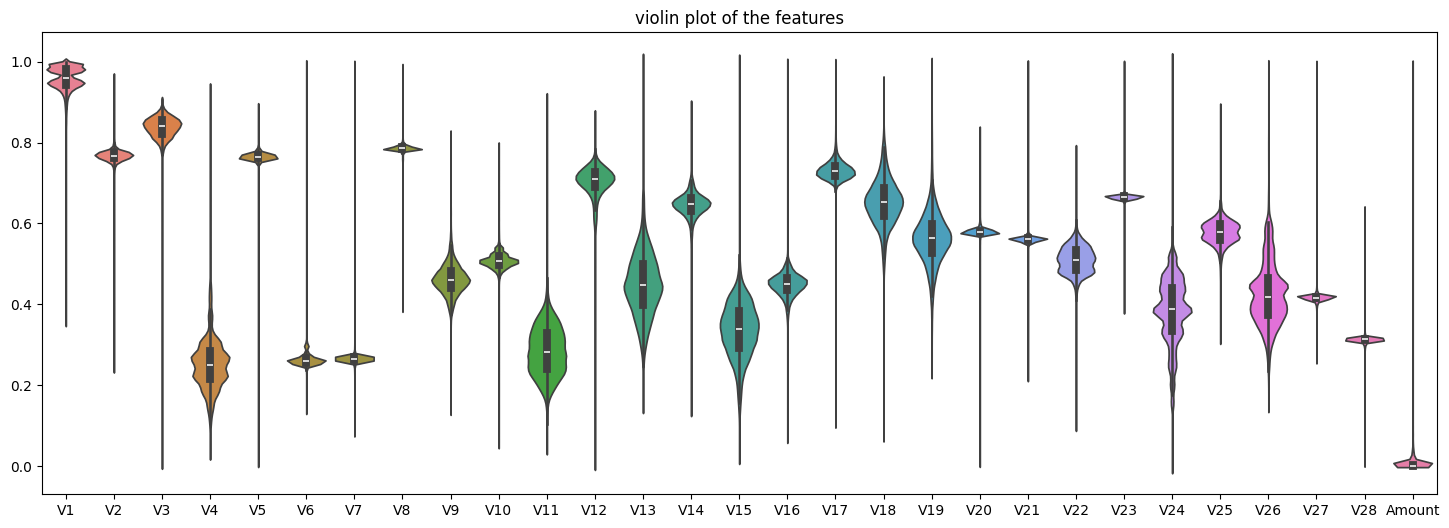

From this we can see that the features have a varying medians and distributions. We can also see that each feature seems to have outliers far from the dense areas,
 as well as realtively compact inter-quartile ranges.


In [5]:
#Task 1a
print(f'We can also visualize the median, the quartiles and the distribution of the features with a violin plot:')
plt.figure(figsize=(18, 6))
sns.violinplot(data=data)
plt.title('violin plot of the features')
plt.show()
print(f'From this we can see that the features have a varying medians and distributions. We can also see that each feature seems to have outliers far from the dense areas,\n as well as realtively compact inter-quartile ranges.')

We can however look at a heatmap of the correlations of the features to see what we find:



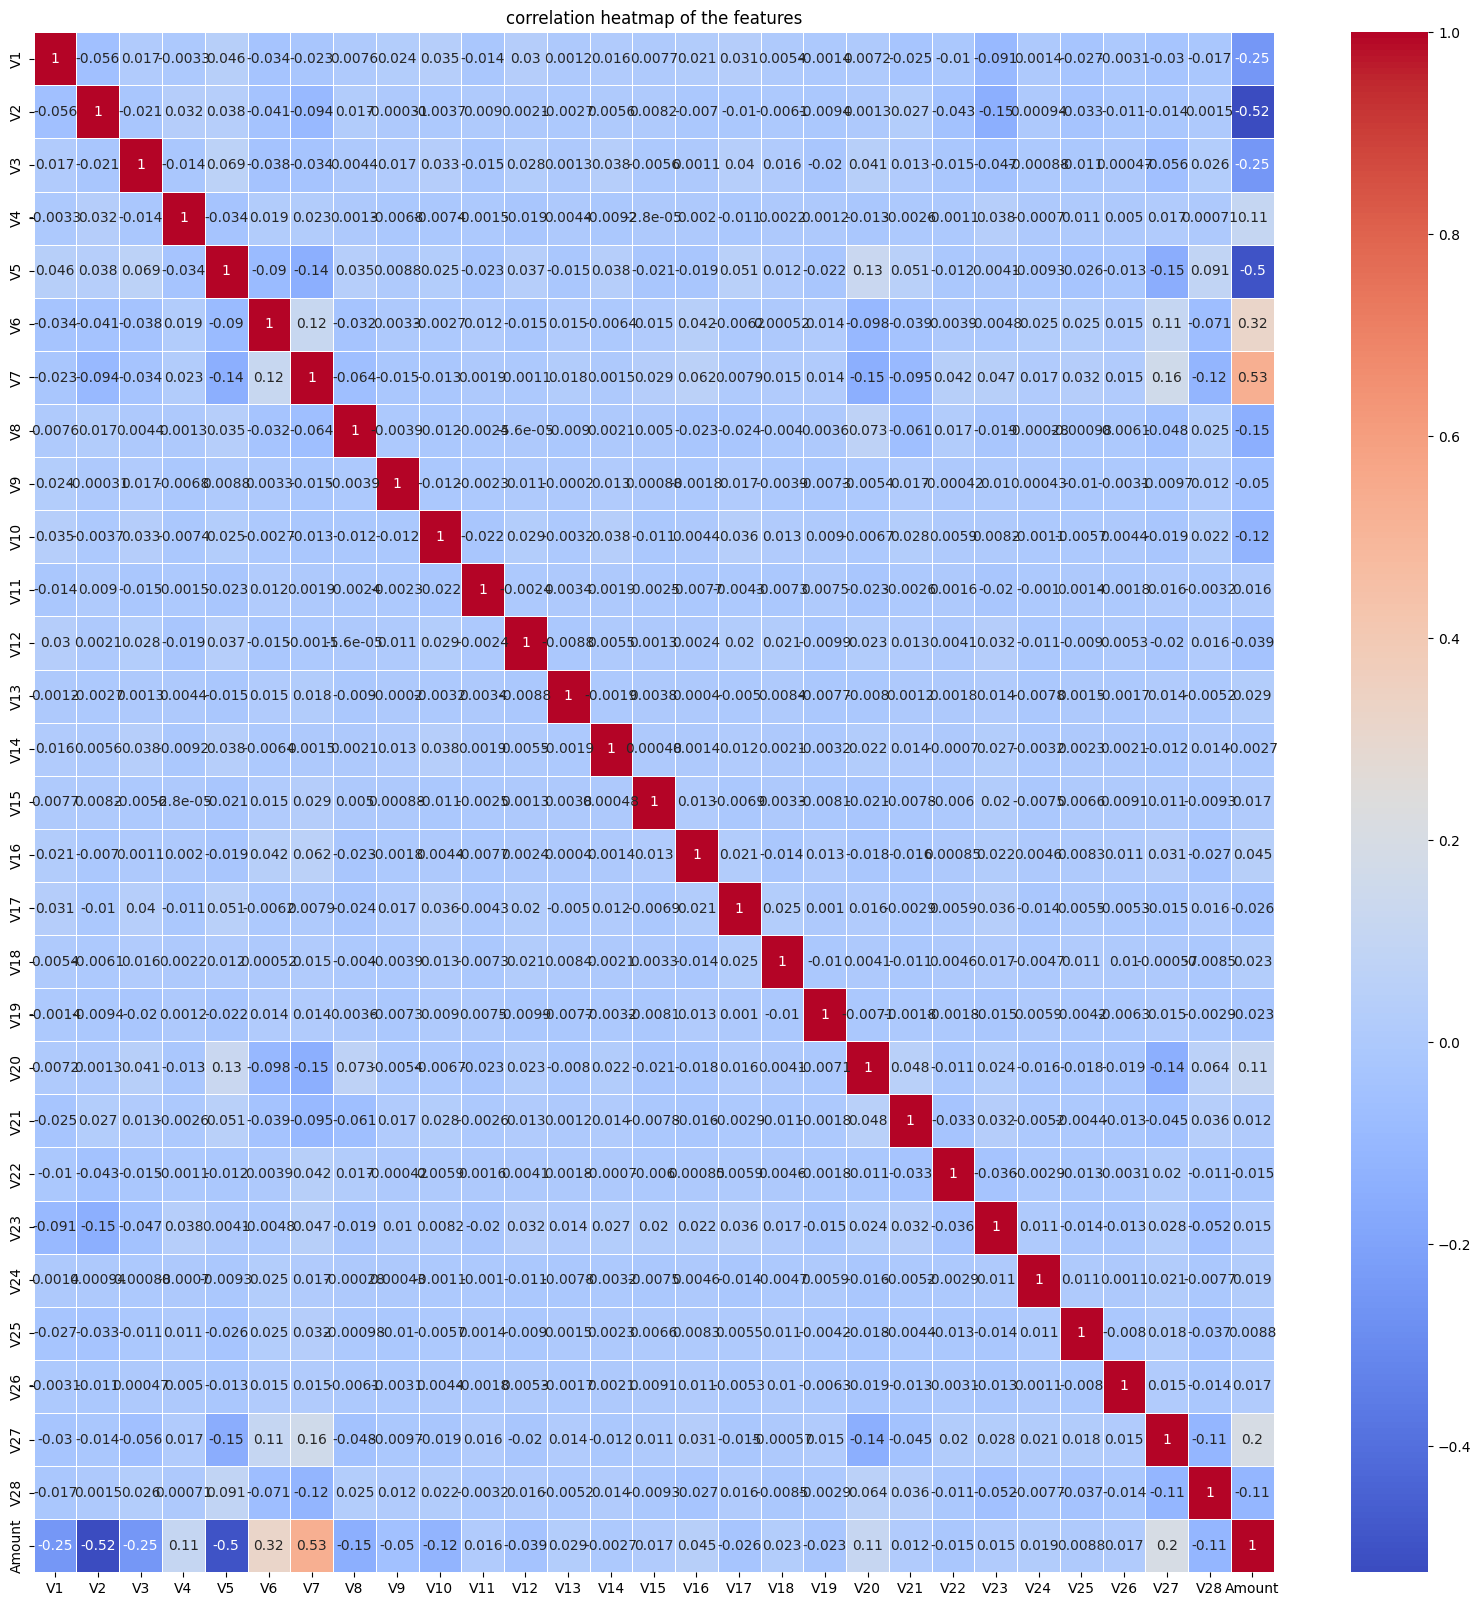

From this heatmap, we can see that the majority of the features have a very low correlation.
The significant correlation coeficients seem to be between the "amount" feature and the initial "v" features.



In [6]:
#Task 1a
print(f'We can however look at a heatmap of the correlations of the features to see what we find:\n')
corr_matr = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('correlation heatmap of the features')
plt.show()
print(f'From this heatmap, we can see that the majority of the features have a very low correlation.\nThe significant correlation coeficients seem to be between the "amount" feature and the initial "v" features.\n')

In [7]:
# Task 1b

# Instantiate the PCA transformer with n_components=2
perplexity = 30
tsne = TSNE(n_components=2, 
            learning_rate='auto',
            perplexity=perplexity) 

data_tsne = tsne.fit_transform(data)

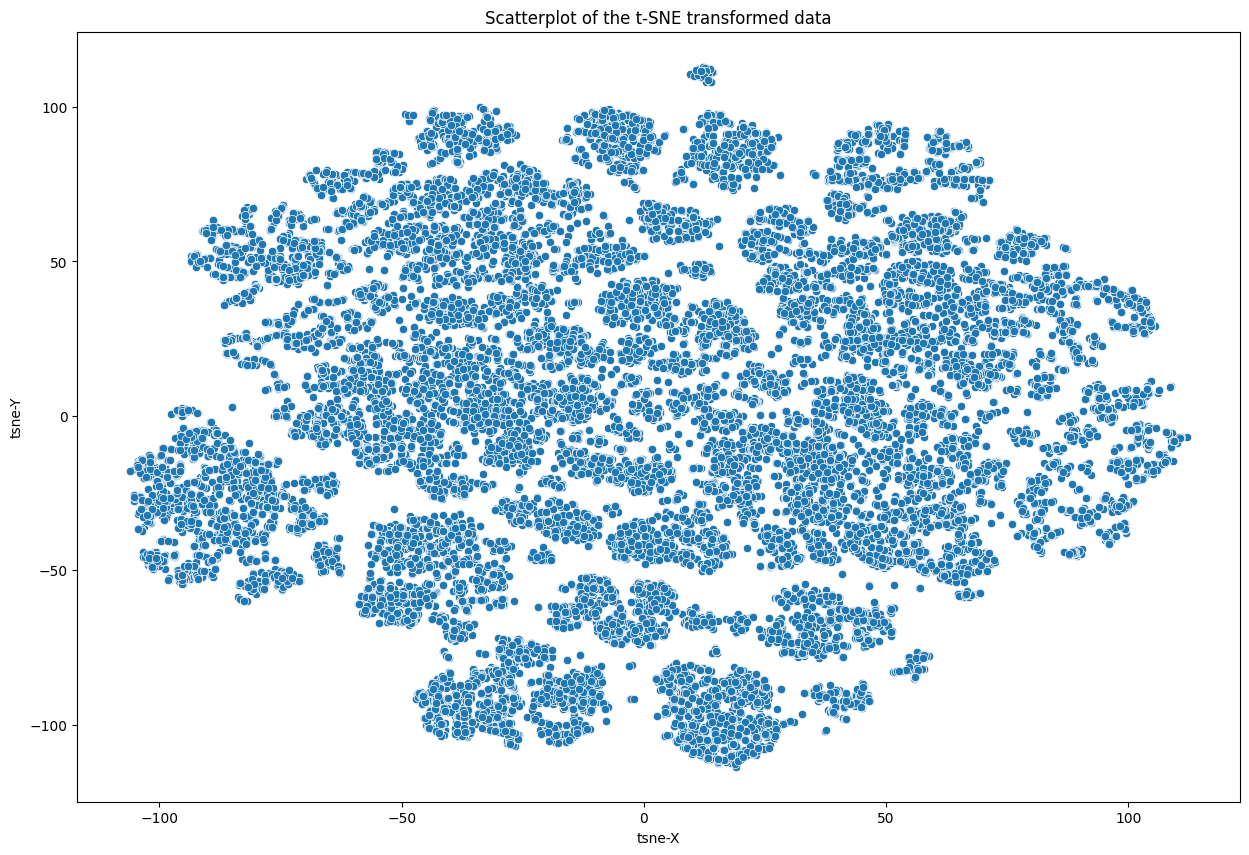

From this plot, we can see that there seems to be a multitude of small and dense clusters, with ocasional sinlge points that fall inbetween, which could be dangerous anomalies. 


In [8]:
# Task 1b'
df_data_tsne = pd.DataFrame(data_tsne, columns=["tsne-X", "tsne-Y"])
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df_data_tsne['tsne-X'], y=df_data_tsne['tsne-Y'])
plt.title('Scatterplot of the t-SNE transformed data')
plt.show()
print(f'From this plot, we can see that there seems to be a multitude of small and dense clusters, with ocasional sinlge points that fall inbetween, which could be dangerous anomalies. ')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2 (0.2pts)
### 2a: Your next task is reduce the dimensions of the data to a smaller feature space using PCA. We will use this reduced data in the subsequent tasks.

</div>

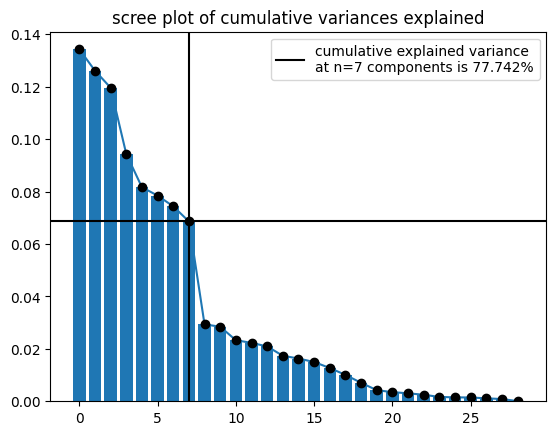

,0,1,2,3,4,5,6
0,0.106651,-0.061725,-0.024329,-0.071428,0.089162,-0.049143,0.053799
1,-0.103778,-0.027150,-0.081305,0.107676,-0.041875,0.054751,-0.060446
2,-0.024413,-0.163468,0.233910,0.016007,-0.022883,0.022952,0.027790
3,-0.008166,0.031633,-0.072819,0.020739,0.045172,-0.021537,-0.056786
4,0.077150,0.163480,0.030800,0.007766,-0.041039,-0.028625,0.078540


In [9]:
#Task 2a
pca = PCA()
data_pca = pca.fit(data)

variences_explained = data_pca.explained_variance_ratio_
cumulative_variance_explained = []
current = 0
for var in variences_explained:
    current += (var*100)
    cumulative_variance_explained.append(current)

plt.plot(range(len(variences_explained)), variences_explained)
plt.scatter(range(len(variences_explained)), variences_explained, color='black', zorder=10)
plt.bar(range(len(variences_explained)), variences_explained)
plt.axvline(x=7, c='black')
plt.axhline(y=variences_explained[7], color='black', label=f'cumulative explained variance \nat n=7 components is {np.round(cumulative_variance_explained[7], 3)}%')
plt.title('scree plot of cumulative variances explained')
plt.legend()
plt.show()

# We can see that the varaiance explained starts to diminish at n=8 principal components, therefore i have chose n=components as the cutoff.

df_data_pca = pd.DataFrame(PCA(n_components=7).fit_transform(data))
df_data_pca.head()

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3 (0.2pts)

    
### 3a: Use two clustering methods to cluster the data. Remember you have to show how you obtained the optimal number of clusters.
### 3b: Additionally, visualize the clustered data and give a brief report of your findings.

</div>

In [38]:
# Task 3a
# Hierarchical clusering with wards linkage???? Most clustering algorithms are optimized for n=2 components, how can we visualize this? 

####################################################################################################################################################


# Here i will apply DBSCAN on the PCA-reduced data, even though we still have 7 principal components. From what i found, this is relatively efficient for high dimensionality. 
eps = 0.09
min_samples = 3
DBSCAN_model = DBSCAN(eps=eps, min_samples=5, metric='euclidean').fit(df_data_pca)
np.unique(DBSCAN_model.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

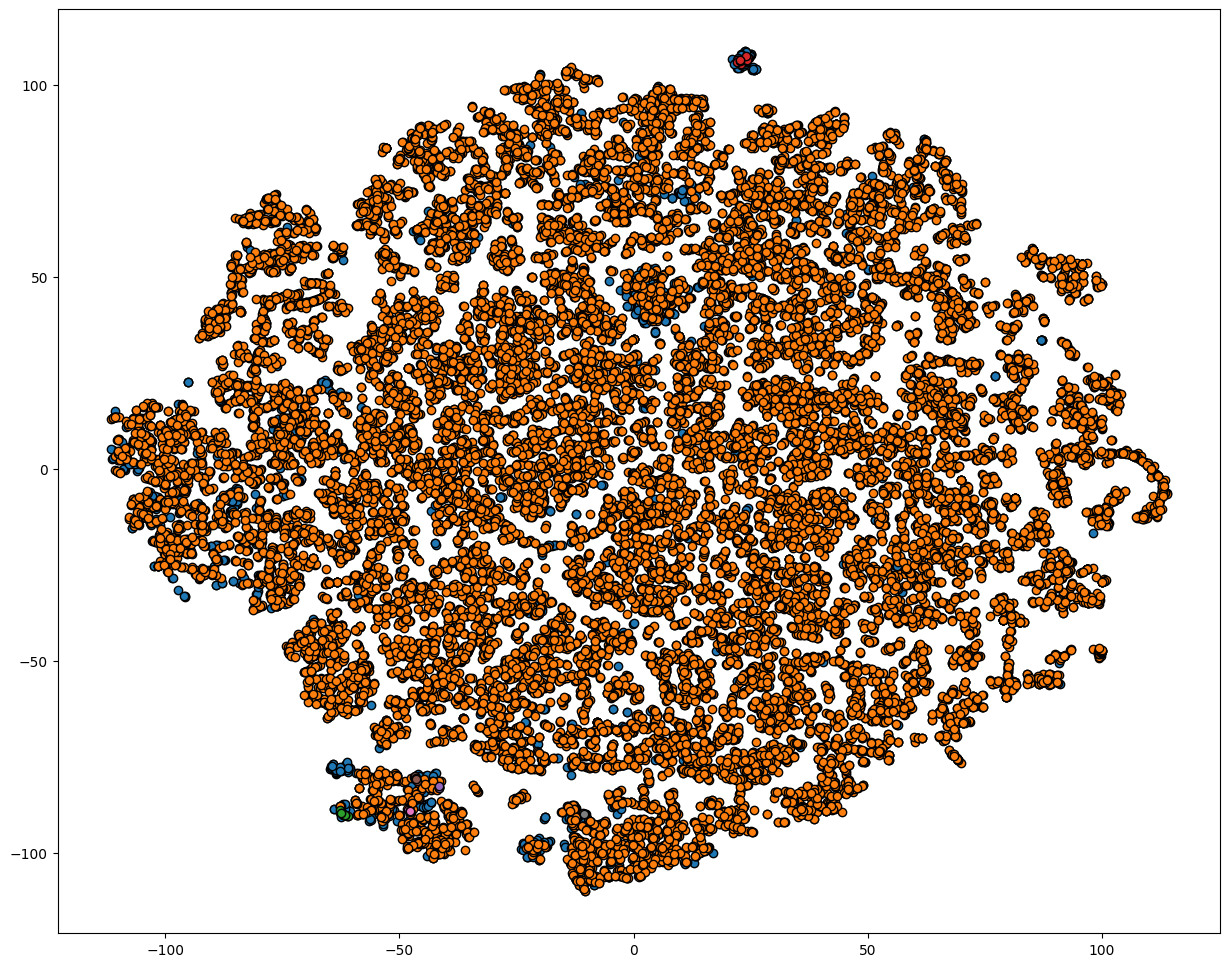

In [39]:
# TSNE for plotting
perplexity = 30
tsne_DBSCAN = TSNE(n_components=2, 
            learning_rate='auto',
            perplexity=perplexity) 

tsne_transformed_DBSCAN_data = tsne_DBSCAN.fit_transform(df_data_pca)
combined_tsne_transformed_DBSCAN_data = pd.DataFrame(tsne_transformed_DBSCAN_data, columns=["tsne-X", "tsne-Y"])
combined_tsne_transformed_DBSCAN_data['target'] = DBSCAN_model.labels_
combined_tsne_transformed_DBSCAN_data

plt.figure(figsize=(15,12))
for cluster_index in np.unique(DBSCAN_model.labels_):
    data_to_plot = combined_tsne_transformed_DBSCAN_data.loc[combined_tsne_transformed_DBSCAN_data['target']==cluster_index]
    plt.scatter(x=data_to_plot.iloc[:,0], 
                y=data_to_plot.iloc[:,1],
                edgecolor='black',) 
plt.show()

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4 (0.4pts)
### In this section, you will attempt to find anomalies in the credit card data in a purely unsupervised setting. The experts have informed us that there is about 0.17% fraudulent transactions in the dataset.

### 4a: Use three anomaly detection methods to find the anomalies in the data. 
### 4b: Since we are working in an unsupervised setting, we need to use the anomaly scores and set a threshold to identify anomalies. We can achieve this by graphing the anomaly scores and visualizing their distribution. Recall that higher scores are anomalies and lower scores are normal points.
### 4c: Visualize the normal and anomaly points detected. Compare and contrast the results obtained from the different models.

</div>

In [188]:
## YOUR CODE HERE